In [1]:
#导入需要用到的包
import pandas as pd
import numpy as np
from numpy import *
from sklearn.linear_model import LogisticRegressionCV
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## qlib 包
import qlib
from qlib.utils import init_instance_by_config
from qlib.workflow import R
from qlib.workflow.record_temp import SignalRecord

import warnings 
warnings.filterwarnings('ignore') #忽略匹配的警告
# matplotlib.rc("font", family='Kaiti')#设置中文字体
matplotlib.rcParams['axes.unicode_minus'] = False#正确显示正负号



In [2]:
class Get_hd():

    def __init__(self):
        self.hd = self.get_hd()

    def get_hd(self):
        qlib.init(provider_uri='/root/autodl-tmp/Stockformer/SOTA_Model_Comparison/qlib_data/ch_data')

        # 数据参数
        handler_kwargs = {
                "start_time": params.qlib_start_date,
                "end_time": params.qlib_end_date,
                "fit_start_time": params.qlib_train_dates[0],
                "fit_end_time": params.qlib_train_dates[1],
                "instruments": 'all',
        }
        # 因子生成参数
        handler_conf = {
            "class": "Alpha360",
            "module_path": "qlib.contrib.data.handler",
            "kwargs": handler_kwargs,
        }
        hd = init_instance_by_config(handler_conf)

        return hd
    
class Get_Models_pre():
    
    def __init__(self,hd):
        self.hd = hd
        self.dataset_conf = {
        "class": "DatasetH",
        "module_path": "qlib.data.dataset",
        "kwargs": {
            "handler": self.hd,
            "segments": {
                "train": params.qlib_train_dates,
                "valid": params.qlib_valid_dates,
                "test": params.qlib_test_dates,
            },
        },
        }
        self.dataset = init_instance_by_config(self.dataset_conf)

    def experiment_run(self,NAME,model):

        with R.start(experiment_name=NAME):
            model.fit(self.dataset)
            R.save_objects(trained_model=model)

            rec = R.get_recorder()
            rid = rec.id # save the record id

            # Inference and saving signal
            sr = SignalRecord(model, self.dataset, rec)
            sr.generate()
        recorder = R.get_recorder(recorder_id=rid, experiment_name=NAME)
        pred_df = recorder.load_object("pred.pkl")
        
        return pred_df
    
    ## 1 lgb
    def get_lgb(self):

        NAME = 'lgb'
        model = init_instance_by_config({
        "class": "LGBModel",
        "module_path": "qlib.contrib.model.gbdt",
        "kwargs": {
            "d_feat": 360,
            "lr": 1e-4
        },
        })
        pred_df = self.experiment_run(NAME,model)
        return pred_df
    
    ## 2 catboost
    def get_catboost(self):

        NAME = 'catboost'

        model = init_instance_by_config({
                "class": "CatBoostModel",
                "module_path": "qlib.contrib.model.catboost_model",
                "kwargs": {
                    # "d_feat": 360,
                    # "lr": 1e-4
                },
        })

        pred_df = self.experiment_run(NAME,model)
        return pred_df
    
    ## 3 XGB
    def get_xgb(self):

        NAME = 'xgb'

        model = init_instance_by_config({
                "class": "XGBModel",
                "module_path": "qlib.contrib.model.xgboost",
                "kwargs": {
                    # "d_feat": 360,
                    # "lr": 1e-4
                },
        })

        pred_df = self.experiment_run(NAME,model)
        return pred_df
    
    ## 4 tcn
    def get_tcn(self):

        NAME = 'tcn'

        model = init_instance_by_config({
                "class": "TCN",
                "module_path": "qlib.contrib.model.pytorch_tcn",
                "kwargs": {
                    "d_feat": 360,
                    "lr": 1e-4,
                    "seed": 1,
                },
        })

        pred_df = self.experiment_run(NAME,model)
        return pred_df

    ## 5 lstm 
    def get_lstm(self):

        NAME = 'lstm'

        model = init_instance_by_config({
                "class": "LSTM",
                "module_path": "qlib.contrib.model.pytorch_lstm",
                "kwargs": {
                    "d_feat": 360,
                    "lr": 1e-4,
                    "seed": 1,
                },
        })

        pred_df = self.experiment_run(NAME,model)
        return pred_df
    
    ## 6 localformer
    def get_localformer(self):

        NAME = 'localformer'

        model = init_instance_by_config({
                "class": "LocalformerModel",
                "module_path": "qlib.contrib.model.pytorch_localformer",
                "kwargs": {
                    "d_feat": 360,
                    "lr": 1e-4,
                    "seed": 1,
                },
        })

        pred_df = self.experiment_run(NAME,model)
        return pred_df

    ## 7 gru
    def get_gru(self):

        NAME = 'gru'

        model = init_instance_by_config({
                "class": "GRU",
                "module_path": "qlib.contrib.model.pytorch_gru",
                "kwargs": {
                    "d_feat": 360,
                    "lr": 1e-4,
                    "seed": 1,
                },
        })

        pred_df = self.experiment_run(NAME,model)
        return pred_df

    ## 8 transformer
    def get_transformer(self):

        NAME = 'transformer'

        model = init_instance_by_config({
                "class": "TransformerModel",
                "module_path": "qlib.contrib.model.pytorch_transformer",
                "kwargs": {
                    "d_feat": 360,
                    "lr": 1e-4,
                    "seed": 1,
                },
        })

        pred_df = self.experiment_run(NAME,model)
        return pred_df
    
    ## 9 alstm
    def get_alstm(self):
        
        NAME = 'alstm'
        
        model = init_instance_by_config({
                "class": "ALSTM",
                "module_path": "qlib.contrib.model.pytorch_alstm",
                "kwargs": {
                    "d_feat": 360,
                    "lr": 1e-4,
                    "seed": 1,
                },
        })
        
        pred_df = self.experiment_run(NAME,model)
        return pred_df
    
    ## 10 GATS
    def get_gats(self):
        
        NAME = 'gats'
        
        model = init_instance_by_config({
                "class": "GATs",
                "module_path": "qlib.contrib.model.pytorch_gats",
                "kwargs": {
                    "d_feat": 360,
                    "lr": 1e-4,
                    "seed": 1,
                },
        })
        
        pred_df = self.experiment_run(NAME,model)
        return pred_df

class Get_Data():

    def __init__(self,params,df_close,df_factor):
       
        # 获取因子
        self.factor = df_factor

        self.params = params
        self.close = df_close #获取收盘价
        self.close_pre = self.close.shift(1) #获取前一日收盘价
        

        # 计算收益率序列
        self.Return = (self.close - self.close_pre) / self.close_pre

        # 截取开始与终止回测时间
        self.close = self.close.loc[pd.to_datetime(self.params.start_date):pd.to_datetime(self.params.end_date)]#截取回测时期内收盘价数据
        self.close_pre = self.close_pre.loc[pd.to_datetime(self.params.start_date):pd.to_datetime(self.params.end_date)]
        self.Return = self.Return.loc[pd.to_datetime(self.params.start_date):pd.to_datetime(self.params.end_date)]
        self.factor = self.factor.loc[pd.to_datetime(self.params.start_date):pd.to_datetime(self.params.end_date)]

        # 获取全部交易日
        self.all_dates = self.close.index.strftime('%Y-%m-%d').tolist()
        # 获取股票代码
        self.all_codes = self.factor.columns.tolist()
        # 获取全部换仓日
        self.all_trade_dates = self.factor.index.strftime('%Y-%m-%d').tolist()

        # # 计算月初交易日换仓日序列
        # self.all_trade_dates = pd.DataFrame({'TradeDates':self.all_dates},index=self.all_dates)
        # self.all_trade_dates['Month'] = pd.to_datetime(self.all_trade_dates['TradeDates']).dt.strftime('%Y-%m')
        # self.all_trade_dates = self.all_trade_dates.groupby('Month')['TradeDates'].first().reset_index()['TradeDates'].tolist()
        # self.all_trade_dates = self.all_trade_dates[1:]  # 第一个月初始化持仓即可 不需要换仓



# 回测框架
class Backtest():
    
    # 初始化
    def __init__(self, params, gn_data):
        
        # 参数
        self.params = params
        
        # 回测参数
        self.fee = self.params.fee
        
        # 传入数据
        self.close = gn_data.close[gn_data.factor.columns]
        self.all_dates = gn_data.all_dates
        self.all_codes = gn_data.all_codes
        self.all_trade_dates = gn_data.all_trade_dates
        
        # 因子标的
        self.factor = gn_data.factor.T

        # 进行回测
        self.layer_backtest = self.Backtest()

    # 实际回测
    def Backtest(self):
        
        # 初始化净值结果矩阵
        self.layer_backtest = pd.DataFrame()
        self.turnover = pd.DataFrame()


        # 换仓日在所有交易日序列中的index
        id_dates_trade = [i_date for i_date,date in enumerate(self.all_dates) if date in self.all_trade_dates]

        # 开始回测到第一个换仓日前，由于没有交易信号，全部置为0
        value_daily = pd.Series(0, index=self.all_dates)
        value_daily.iloc[:id_dates_trade[0]+1] = 1 

        # 初始化因子权重，长度为所有股票数量
        weight_last = pd.Series(0, index=self.factor.index)

        # 初始化换手率（计算手续费）index为换仓日期
        turnover = pd.Series(0, index=self.all_trade_dates)

        # 收益率
        Return = pd.Series(0, index=self.all_trade_dates)

        # 实际权重
        # 行为所有股票，列为换仓日
        real_weight = pd.DataFrame(index=self.factor.index, columns=self.factor.columns)
        k = self.params.k
        for date in self.factor.columns:
            # 找到当前列中因子值最大的前10个股票的索引
            top_k_indices = self.factor[date].nlargest(k).index
            real_weight.loc[top_k_indices, date] = 1 / k
            real_weight[date] = real_weight[date].fillna(0)
  

        # 对交易日进行循环                                
        # 这里的id_dates_trade是换仓日在全部交易日中的index序列
        # i_date_trade代表这是换仓日序列中第几个换仓日 id_date_trade代表这个换仓日是交易日中第几个交易日
        # 都是index索引 不牵涉具体日期的值
        for i_date_trade, id_date_trade in enumerate(id_dates_trade): 
            # id_dates_trade例[20, 41, 64, 84, 101, 123]
            # i_dates_trade 如[0, 1, 2, 3, 4, 5]

            # ———————————————调仓设置（只调仓+记录，不更新净值）—————————————————
            
            # 记录上个月月末的权重和这个月月初的买入价
            # 月度  当前换仓日的weight序列，index为all_codes
            weight_now = real_weight.iloc[:, i_date_trade]
            # 日度 换仓日close序列, index为all_codes  
            price_buy = self.close.T.iloc[:, id_date_trade] 

            # 记录当前基准value的值（是上一个月末延续下来的净值日，应该记录）
            value_port = value_daily.iloc[id_date_trade]  # todo

            # 记录换手率（双边换手率）
            turnover.iloc[i_date_trade] = sum(abs(weight_now.values - weight_last.values))
            value_port = value_port * (1 - turnover.iloc[i_date_trade] * self.fee)  # 扣交易费用

            # ——————————————换仓周期日度净值更新（只更新净值，不调仓）—————————————————

            if id_date_trade < id_dates_trade[-1]:
                # 净值日为换仓日至下一个换仓日
                # 换仓日的下一日 至 下一个换仓日之间的all_codes的索引
                # 若i_date_trade=1, id_date_trade=1, 则id_dates_value=[2]
                id_dates_value = list(range(id_date_trade+1, id_dates_trade[i_date_trade + 1] + 1))
            # 如果是最后一个换仓日
            elif id_date_trade == id_dates_trade[-1]:
                # 净值日为换仓日至回测终止日
                id_dates_value = list(range(id_date_trade+1, len(self.all_dates)))
            else:
                id_dates_value = []

            # 计算每日净值
            for id_date_value in id_dates_value:
                # for i in [2]

                # 记录后复权价
                # 当前日收盘价，index为all_codes
                price_value = self.close.T.iloc[:, id_date_value]

                # 现在的实际权重等于上个月的月末权重 * 月底调仓买入价 / 月初调仓卖出价
                weight_last = (weight_now * price_value / price_buy).fillna(0)

                # 计算收益率
                returns_port = np.nansum(weight_now * (price_value / price_buy - 1))     #收益=sum（上月末权重*（收盘价/买入价-1）） 
                Return.iloc[id_date_value] = returns_port

                # 计算净值；若为当期换仓日的最后一个净值日，则此净值为下期换仓日计算净值的基准
                value_daily.iloc[id_date_value] = value_port * (1 + returns_port)  #当期净值=上期净值*（1+收益）

                if self.params.if_print:
                    # 输出日志
                    print('{}  收益{:.2%}，累计净值{:.4}'.format(self.all_dates[id_date_value],
                                                    returns_port,
                                                    value_daily.iloc[id_date_value]))

        # 输出结果
        # 保存净值曲线，换手率等指标
        self.layer_backtest['净值'] = value_daily.dropna()
        self.layer_backtest['换手率'] = turnover.dropna()
        self.layer_backtest['收益率'] = Return.dropna()
        self.layer_backtest.index = pd.to_datetime(self.layer_backtest.index)
        
        # 输出结果
        return self.layer_backtest

In [3]:
class Params():
    ## 数据导入参数
    # 基本参数
    ### 14. '2021-06-04_2024-01-30'
    qlib_start_date = '2021-06-04'
    qlib_end_date = '2024-01-30'
    qlib_train_dates = ("2021-06-04", "2023-06-05")
    qlib_valid_dates = ("2023-06-06", "2023-11-06")
    qlib_test_dates = ("2023-11-07", "2024-01-30")
    
    # 动态生成路径中的日期部分
    @property
    def multitask_output_path(self):
        return f'/root/autodl-tmp/Stockformer/Stockformer_run/Stockformer_code/output/Multitask_output_{self.qlib_start_date}_{self.qlib_end_date}'

    close_path = '/root/autodl-tmp/Stockformer/Stockformer_run/data_processing/eda_and_result_analyze/backtest_data/18-24标准数据.csv'  # 收盘价
    hs300_path = '/root/autodl-tmp/Stockformer/Stockformer_run/data_processing/eda_and_result_analyze/backtest_data/沪深300_close.csv'  # 沪深300指数
    
    @property
    def reg_pre_path(self):
        return f'{self.multitask_output_path}/regression/regression_pred_with_index_fill_-1e9.csv'  # 回归预测结果
    
    # 返回第一种分类结果路径
    @property
    def cla_pre_path_with_index(self):
        return f'{self.multitask_output_path}/classification/classification_pred_with_index.csv'

    # 返回第二种分类结果路径
    @property
    def cla_pre_path_prob_fill_0(self):
        return f'{self.multitask_output_path}/classification/classification_pred_prob_fill_0.csv'


    ## 对比模型
    if_lgb = True
    if_xgb = True
    if_catboost = True
    if_tcn = True
    if_lstm = True
    if_localformer = True
    if_gru = True
    if_transformer = True
    if_alstm = True
    if_gats = True

    ## 回测参数
    @property
    def start_date(self):
        return self.qlib_test_dates[0]  # 回测开始时间

    @property
    def end_date(self):
        return self.qlib_test_dates[1]  # 回测结束时间
    
    fee = 0.00  # 交易费用
    k = 10  # 策略选股数量
    if_print = False  # 打印回测日志

In [4]:
#### 1.导入回测数据

# 加载参数
params = Params()

# 收盘价
df = pd.read_csv(params.close_path,index_col=0)
df['date'] = pd.to_datetime(df['date'])
df_close = df.pivot(index='date', columns='code', values='close')

# hs300指数
hs300 = pd.read_csv(params.hs300_path)
hs300['date'] = pd.to_datetime(hs300['date'])
hs300.set_index(['date'],inplace=True)
hs300 = hs300.sort_index(ascending=True)
hs300  = hs300.rename_axis(None)
hs300 = hs300.loc[pd.to_datetime(params.start_date):pd.to_datetime(params.end_date)]
# 计算每天的收益率
hs300['daily_return'] = hs300['close'].pct_change()
# 计算每天的累计收益率
hs300['cumulative_return'] = (1 + hs300['daily_return']).cumprod()
# 将第一天的累计收益率设为1
hs300.loc[hs300.index[0], 'cumulative_return'] = 1

# 论文模型
### 返回第一种分类结果
df_cla = pd.read_csv(params.cla_pre_path_with_index)
df_cla['datetime'] = pd.to_datetime(df_cla['datetime'])
df_cla.set_index(['datetime'],inplace=True)

### 返回第二种分类结果
df_cla_prob = pd.read_csv(params.cla_pre_path_prob_fill_0)
df_cla_prob['datetime'] = pd.to_datetime(df_cla_prob['datetime'])
df_cla_prob.set_index(['datetime'],inplace=True)

df_reg_prob = pd.read_csv(params.reg_pre_path)
df_reg_prob['datetime'] = pd.to_datetime(df_reg_prob['datetime'])
df_reg_prob.set_index(['datetime'],inplace=True)

In [5]:
# df = pd.read_csv('../data/LABEL_Alpha_158.csv')
# df['datetime'] = pd.to_datetime(df['datetime'])
# df_reg_prob.columns = df.columns[1:]
# df_reg_prob.index = df['datetime'][(df['datetime']>=pd.to_datetime('2023-07-07'))].values

In [6]:
#### 2.导入qlib模型数据

# 对比模型
get_hd = Get_hd()
hd = get_hd.hd

## 1 lgb
if params.if_lgb:
    pre = Get_Models_pre(hd)
    df_m = pre.get_lgb()
    df_m = df_m.reset_index()
    df_m['datetime'] = pd.to_datetime(df_m['datetime'])
    df_lgb = df_m.pivot(index='instrument', columns='datetime', values='score')

## 2 catboost
if params.if_catboost:
    pre = Get_Models_pre(hd)
    df_m = pre.get_catboost()
    df_m = df_m.reset_index()
    df_m['datetime'] = pd.to_datetime(df_m['datetime'])
    df_catboost = df_m.pivot(index='instrument', columns='datetime', values='score')

## 3 xgb
if params.if_xgb:
    pre = Get_Models_pre(hd)
    df_m = pre.get_xgb()
    df_m = df_m.reset_index()
    df_m['datetime'] = pd.to_datetime(df_m['datetime'])
    df_xgb = df_m.pivot(index='instrument', columns='datetime', values='score')

## 4 tcn
if params.if_tcn:
    pre = Get_Models_pre(hd)
    df_m = pre.get_tcn()
    df_m = df_m.reset_index()
    df_m['datetime'] = pd.to_datetime(df_m['datetime'])
    df_tcn = df_m.pivot(index='instrument', columns='datetime', values='score')

## 5 lstm
if params.if_lstm:
    pre = Get_Models_pre(hd)
    df_m = pre.get_lstm()
    df_m = df_m.reset_index()
    df_m['datetime'] = pd.to_datetime(df_m['datetime'])
    df_lstm = df_m.pivot(index='instrument', columns='datetime', values='score')

## 6 localformer
if params.if_localformer:
    pre = Get_Models_pre(hd)
    df_m = pre.get_localformer()
    df_m = df_m.reset_index()
    df_m['datetime'] = pd.to_datetime(df_m['datetime'])
    df_localformer = df_m.pivot(index='instrument', columns='datetime', values='score')

## 7 gru
if params.if_gru:
    pre = Get_Models_pre(hd)
    df_m = pre.get_gru()
    df_m = df_m.reset_index()
    df_m['datetime'] = pd.to_datetime(df_m['datetime'])
    df_gru = df_m.pivot(index='instrument', columns='datetime', values='score')

## 8 transformer
if params.if_transformer:
    pre = Get_Models_pre(hd)
    df_m = pre.get_transformer()
    df_m = df_m.reset_index()
    df_m['datetime'] = pd.to_datetime(df_m['datetime'])
    df_transformer = df_m.pivot(index='instrument', columns='datetime', values='score')
    
if params.if_alstm:
    pre = Get_Models_pre(hd)
    df_m = pre.get_alstm()
    df_m = df_m.reset_index()
    df_m['datetime'] = pd.to_datetime(df_m['datetime'])
    df_alstm = df_m.pivot(index='instrument', columns='datetime', values='score')
    
if params.if_gats:
    pre = Get_Models_pre(hd)
    df_m = pre.get_gats()
    df_m = df_m.reset_index()
    df_m['datetime'] = pd.to_datetime(df_m['datetime'])
    df_gats = df_m.pivot(index='instrument', columns='datetime', values='score')

[15869:MainThread](2024-05-08 16:20:16,406) INFO - qlib.Initialization - [config.py:416] - default_conf: client.
[15869:MainThread](2024-05-08 16:20:16,419) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[15869:MainThread](2024-05-08 16:20:16,422) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': PosixPath('/root/autodl-tmp/Stockformer/SOTA_Model_Comparison/qlib_data/ch_data')}
[15869:MainThread](2024-05-08 16:20:50,874) INFO - qlib.timer - [log.py:127] - Time cost: 34.446s | Loading data Done
/root/miniconda3/lib/python3.8/site-packages/qlib/utils/paral.py:54: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this war

Training until validation scores don't improve for 50 rounds
[20]	train's l2: 0.973415	valid's l2: 0.99769
[40]	train's l2: 0.954632	valid's l2: 0.998507
Early stopping, best iteration is:
[1]	train's l2: 0.994526	valid's l2: 0.9962


[15869:MainThread](2024-05-08 16:21:53,215) INFO - qlib.workflow - [record_temp.py:198] - Signal record 'pred.pkl' has been saved as the artifact of the Experiment 1


'The following are prediction results of the LGBModel model.'
                          score
datetime   instrument          
2023-11-07 000001.SZ  -0.000889
           000002.SZ  -0.000889
           000063.SZ   0.004676
           000069.SZ  -0.000889
           000100.SZ  -0.000889


[15869:MainThread](2024-05-08 16:21:53,540) INFO - qlib.timer - [log.py:127] - Time cost: 0.000s | waiting `async_log` Done
[15869:MainThread](2024-05-08 16:21:53,568) INFO - qlib.workflow - [exp.py:258] - Experiment 2 starts running ...
[15869:MainThread](2024-05-08 16:21:53,578) INFO - qlib.workflow - [recorder.py:341] - Recorder b39bbac99d014e4c9481cb4b34b2e42c starts running under Experiment 2 ...
usage: git diff --no-index [<options>] <path> <path>

Diff output format options
    -p, --patch           generate patch
    -s, --no-patch        suppress diff output
    -u                    generate patch
    -U, --unified[=<n>]   generate diffs with <n> lines context
    -W, --function-context
                          generate diffs with <n> lines context
    --raw                 generate the diff in raw format
    --patch-with-raw      synonym for '-p --raw'
    --patch-with-stat     synonym for '-p --stat'
    --numstat             machine friendly --stat
    --shortstat        

Learning rate set to 0.104514
0:	learn: 0.9978738	test: 0.9980749	best: 0.9980749 (0)	total: 10.3ms	remaining: 10.3s
20:	learn: 0.9947660	test: 0.9984189	best: 0.9980727 (2)	total: 74.7ms	remaining: 3.48s


[15869:MainThread](2024-05-08 16:21:56,838) INFO - qlib.workflow - [record_temp.py:198] - Signal record 'pred.pkl' has been saved as the artifact of the Experiment 2
[15869:MainThread](2024-05-08 16:21:56,845) INFO - qlib.timer - [log.py:127] - Time cost: 0.000s | waiting `async_log` Done
[15869:MainThread](2024-05-08 16:21:56,870) INFO - qlib.workflow - [exp.py:258] - Experiment 3 starts running ...
[15869:MainThread](2024-05-08 16:21:56,880) INFO - qlib.workflow - [recorder.py:341] - Recorder bd58570ce7bd4e5baba4975dad07baba starts running under Experiment 3 ...


40:	learn: 0.9919130	test: 0.9988346	best: 0.9980727 (2)	total: 145ms	remaining: 3.39s
bestTest = 0.9980726513
bestIteration = 2
Shrink model to first 3 iterations.
'The following are prediction results of the CatBoostModel model.'
                          score
datetime   instrument          
2023-11-07 000001.SZ  -0.001396
           000002.SZ   0.000531
           000063.SZ   0.000887
           000069.SZ  -0.001029
           000100.SZ  -0.001159


usage: git diff --no-index [<options>] <path> <path>

Diff output format options
    -p, --patch           generate patch
    -s, --no-patch        suppress diff output
    -u                    generate patch
    -U, --unified[=<n>]   generate diffs with <n> lines context
    -W, --function-context
                          generate diffs with <n> lines context
    --raw                 generate the diff in raw format
    --patch-with-raw      synonym for '-p --raw'
    --patch-with-stat     synonym for '-p --stat'
    --numstat             machine friendly --stat
    --shortstat           output only the last line of --stat
    -X, --dirstat[=<param1,param2>...]
                          output the distribution of relative amount of changes for each sub-directory
    --cumulative          synonym for --dirstat=cumulative
    --dirstat-by-file[=<param1,param2>...]
                          synonym for --dirstat=files,param1,param2...
    --check               warn if changes introduce

[0]	train-rmse:0.99572	valid-rmse:0.99818
[20]	train-rmse:0.96407	valid-rmse:1.00112
[40]	train-rmse:0.93773	valid-rmse:1.00327
[50]	train-rmse:0.92607	valid-rmse:1.00374


[15869:MainThread](2024-05-08 16:22:01,870) INFO - qlib.workflow - [record_temp.py:198] - Signal record 'pred.pkl' has been saved as the artifact of the Experiment 3
[15869:MainThread](2024-05-08 16:22:01,876) INFO - qlib.timer - [log.py:127] - Time cost: 0.000s | waiting `async_log` Done


'The following are prediction results of the XGBModel model.'
                          score
datetime   instrument          
2023-11-07 000001.SZ   0.037107
           000002.SZ   0.001598
           000063.SZ   0.031544
           000069.SZ   0.081213
           000100.SZ   0.072662


[15869:MainThread](2024-05-08 16:22:01,897) INFO - qlib.TCN - [pytorch_tcn.py:63] - TCN pytorch version...
[15869:MainThread](2024-05-08 16:22:01,899) INFO - qlib.TCN - [pytorch_tcn.py:81] - TCN parameters setting:
d_feat : 360
n_chans : 128
kernel_size : 5
num_layers : 5
dropout : 0.5
n_epochs : 200
lr : 0.0001
metric : 
batch_size : 2000
early_stop : 20
optimizer : adam
loss_type : mse
visible_GPU : 0
use_GPU : True
seed : 1
[15869:MainThread](2024-05-08 16:22:01,919) INFO - qlib.TCN - [pytorch_tcn.py:127] - model:
TCNModel(
  (tcn): TemporalConvNet(
    (network): Sequential(
      (0): TemporalBlock(
        (conv1): Conv1d(360, 128, kernel_size=(5,), stride=(1,), padding=(4,))
        (chomp1): Chomp1d()
        (relu1): ReLU()
        (dropout1): Dropout(p=0.5, inplace=False)
        (conv2): Conv1d(128, 128, kernel_size=(5,), stride=(1,), padding=(4,))
        (chomp2): Chomp1d()
        (relu2): ReLU()
        (dropout2): Dropout(p=0.5, inplace=False)
        (net): Sequential(

'The following are prediction results of the TCN model.'
                          score
datetime   instrument          
2023-11-07 000001.SZ  -0.018866
           000002.SZ  -0.010857
           000063.SZ   0.051414
           000069.SZ   0.005111
           000100.SZ   0.000436


usage: git diff --no-index [<options>] <path> <path>

Diff output format options
    -p, --patch           generate patch
    -s, --no-patch        suppress diff output
    -u                    generate patch
    -U, --unified[=<n>]   generate diffs with <n> lines context
    -W, --function-context
                          generate diffs with <n> lines context
    --raw                 generate the diff in raw format
    --patch-with-raw      synonym for '-p --raw'
    --patch-with-stat     synonym for '-p --stat'
    --numstat             machine friendly --stat
    --shortstat           output only the last line of --stat
    -X, --dirstat[=<param1,param2>...]
                          output the distribution of relative amount of changes for each sub-directory
    --cumulative          synonym for --dirstat=cumulative
    --dirstat-by-file[=<param1,param2>...]
                          synonym for --dirstat=files,param1,param2...
    --check               warn if changes introduce

'The following are prediction results of the LSTM model.'
                          score
datetime   instrument          
2023-11-07 000001.SZ   0.020639
           000002.SZ   0.003242
           000063.SZ   0.009585
           000069.SZ  -0.000350
           000100.SZ   0.015166


usage: git diff --no-index [<options>] <path> <path>

Diff output format options
    -p, --patch           generate patch
    -s, --no-patch        suppress diff output
    -u                    generate patch
    -U, --unified[=<n>]   generate diffs with <n> lines context
    -W, --function-context
                          generate diffs with <n> lines context
    --raw                 generate the diff in raw format
    --patch-with-raw      synonym for '-p --raw'
    --patch-with-stat     synonym for '-p --stat'
    --numstat             machine friendly --stat
    --shortstat           output only the last line of --stat
    -X, --dirstat[=<param1,param2>...]
                          output the distribution of relative amount of changes for each sub-directory
    --cumulative          synonym for --dirstat=cumulative
    --dirstat-by-file[=<param1,param2>...]
                          synonym for --dirstat=files,param1,param2...
    --check               warn if changes introduce

'The following are prediction results of the LocalformerModel model.'
                          score
datetime   instrument          
2023-11-07 000001.SZ  -0.022484
           000002.SZ  -0.021980
           000063.SZ  -0.000214
           000069.SZ  -0.019203
           000100.SZ  -0.012748


usage: git diff --no-index [<options>] <path> <path>

Diff output format options
    -p, --patch           generate patch
    -s, --no-patch        suppress diff output
    -u                    generate patch
    -U, --unified[=<n>]   generate diffs with <n> lines context
    -W, --function-context
                          generate diffs with <n> lines context
    --raw                 generate the diff in raw format
    --patch-with-raw      synonym for '-p --raw'
    --patch-with-stat     synonym for '-p --stat'
    --numstat             machine friendly --stat
    --shortstat           output only the last line of --stat
    -X, --dirstat[=<param1,param2>...]
                          output the distribution of relative amount of changes for each sub-directory
    --cumulative          synonym for --dirstat=cumulative
    --dirstat-by-file[=<param1,param2>...]
                          synonym for --dirstat=files,param1,param2...
    --check               warn if changes introduce

'The following are prediction results of the GRU model.'
                          score
datetime   instrument          
2023-11-07 000001.SZ  -0.000784
           000002.SZ  -0.011140
           000063.SZ   0.043979
           000069.SZ   0.009535
           000100.SZ   0.013548


usage: git diff --no-index [<options>] <path> <path>

Diff output format options
    -p, --patch           generate patch
    -s, --no-patch        suppress diff output
    -u                    generate patch
    -U, --unified[=<n>]   generate diffs with <n> lines context
    -W, --function-context
                          generate diffs with <n> lines context
    --raw                 generate the diff in raw format
    --patch-with-raw      synonym for '-p --raw'
    --patch-with-stat     synonym for '-p --stat'
    --numstat             machine friendly --stat
    --shortstat           output only the last line of --stat
    -X, --dirstat[=<param1,param2>...]
                          output the distribution of relative amount of changes for each sub-directory
    --cumulative          synonym for --dirstat=cumulative
    --dirstat-by-file[=<param1,param2>...]
                          synonym for --dirstat=files,param1,param2...
    --check               warn if changes introduce

'The following are prediction results of the TransformerModel model.'
                          score
datetime   instrument          
2023-11-07 000001.SZ   0.045165
           000002.SZ   0.009764
           000063.SZ   0.049692
           000069.SZ   0.033487
           000100.SZ   0.060148


usage: git diff --no-index [<options>] <path> <path>

Diff output format options
    -p, --patch           generate patch
    -s, --no-patch        suppress diff output
    -u                    generate patch
    -U, --unified[=<n>]   generate diffs with <n> lines context
    -W, --function-context
                          generate diffs with <n> lines context
    --raw                 generate the diff in raw format
    --patch-with-raw      synonym for '-p --raw'
    --patch-with-stat     synonym for '-p --stat'
    --numstat             machine friendly --stat
    --shortstat           output only the last line of --stat
    -X, --dirstat[=<param1,param2>...]
                          output the distribution of relative amount of changes for each sub-directory
    --cumulative          synonym for --dirstat=cumulative
    --dirstat-by-file[=<param1,param2>...]
                          synonym for --dirstat=files,param1,param2...
    --check               warn if changes introduce

'The following are prediction results of the ALSTM model.'
                          score
datetime   instrument          
2023-11-07 000001.SZ  -0.000880
           000002.SZ   0.000356
           000063.SZ  -0.000417
           000069.SZ   0.002335
           000100.SZ  -0.006842


usage: git diff --no-index [<options>] <path> <path>

Diff output format options
    -p, --patch           generate patch
    -s, --no-patch        suppress diff output
    -u                    generate patch
    -U, --unified[=<n>]   generate diffs with <n> lines context
    -W, --function-context
                          generate diffs with <n> lines context
    --raw                 generate the diff in raw format
    --patch-with-raw      synonym for '-p --raw'
    --patch-with-stat     synonym for '-p --stat'
    --numstat             machine friendly --stat
    --shortstat           output only the last line of --stat
    -X, --dirstat[=<param1,param2>...]
                          output the distribution of relative amount of changes for each sub-directory
    --cumulative          synonym for --dirstat=cumulative
    --dirstat-by-file[=<param1,param2>...]
                          synonym for --dirstat=files,param1,param2...
    --check               warn if changes introduce

'The following are prediction results of the GATs model.'
                          score
datetime   instrument          
2023-11-07 000001.SZ   0.002778
           000002.SZ   0.003406
           000063.SZ   0.000129
           000069.SZ  -0.002013
           000100.SZ   0.016816


In [7]:
def BT_result(df):
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    gn_data = Get_Data(params,df_close,df)
    bt = Backtest(params,gn_data)
    result = bt.layer_backtest

    return result

result_reg = BT_result(df_reg_prob)
# result_cla = BT_result(df_cla_prob)
## 第一种分类模型回测
result_cla = BT_result(df_cla)
## 第二种分类模型回测
result_cla_prob = BT_result(df_cla_prob)

Performance metrics for first classification model: {'total_return': -0.051194161255129655, 'annualized_return': -0.19805448283761118, 'sharpe_ratio': -1.238217175802899, 'max_drawdown': -0.10948676633771603}
Performance metrics for second classification model with probabilities filled: {'total_return': -0.15986876970754327, 'annualized_return': -0.5188749799930681, 'sharpe_ratio': -3.2821293203191018, 'max_drawdown': -0.18138951021849115}
The best model is the first model based on Sharpe Ratio.


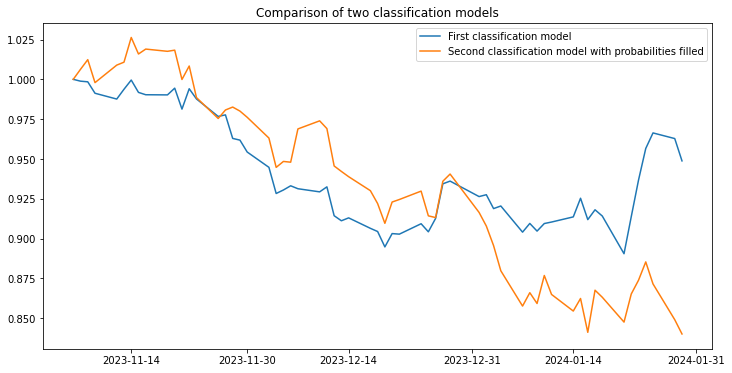

In [8]:
## 分类模型比较
def calculate_performance_metrics(df):
    """计算并返回回测性能指标。"""
    # 假设df['净值']是策略的每日净值
    total_return = df['净值'].iloc[-1] / df['净值'].iloc[0] - 1
    annualized_return = (1 + total_return) ** (252 / len(df)) - 1
    daily_returns = df['净值'].pct_change()
    sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * (252 ** 0.5)  # 年化夏普比率
    max_drawdown = (df['净值'] / df['净值'].cummax() - 1).min()

    return {
        'total_return': total_return,
        'annualized_return': annualized_return,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown
    }

# 计算每种模型的性能指标
metrics_cla = calculate_performance_metrics(result_cla)
metrics_cla_prob = calculate_performance_metrics(result_cla_prob)

# 输出性能指标进行比较
print("Performance metrics for first classification model:", metrics_cla)
print("Performance metrics for second classification model with probabilities filled:", metrics_cla_prob)

# 根据指标选择最佳模型
best_model = 'first' if metrics_cla['sharpe_ratio'] > metrics_cla_prob['sharpe_ratio'] else 'second'
print(f"The best model is the {best_model} model based on Sharpe Ratio.")

# 在一幅图中绘制两个序列
plt.figure(figsize=(12, 6))
plt.plot(result_cla['净值'], label='First classification model')
plt.plot(result_cla_prob['净值'], label='Second classification model with probabilities filled')
plt.title('Comparison of two classification models')
plt.legend()
plt.show()

# 将最优模型结果放到result_cla中
if best_model == 'second':
    result_cla = result_cla_prob


In [9]:
if params.if_lgb:
    result_lgb = BT_result(df_lgb.T)

if params.if_xgb:
    result_xgb = BT_result(df_xgb.T)

if params.if_catboost:
    result_catboost = BT_result(df_catboost.T)

if params.if_lstm:
    result_lstm = BT_result(df_lstm.T)

if params.if_gru:
    result_gru = BT_result(df_gru.T)

if params.if_tcn:
    result_tcn = BT_result(df_tcn.T)

if params.if_localformer:
    result_localformer = BT_result(df_localformer.T)

if params.if_transformer:
    result_transformer = BT_result(df_transformer.T)
    
if params.if_alstm:
    result_alstm = BT_result(df_alstm.T)

if params.if_gats:
    result_gats = BT_result(df_gats.T)


In [10]:
import pandas as pd
import os

# 定义保存数据的基本路径和文件名
base_path = '/root/autodl-tmp/Stockformer/Stockformer_run/Stockformer_code/all_models_backtest_data'
filename = f'all_models_{params.start_date}_to_{params.end_date}.csv'
file_path = os.path.join(base_path, filename)

# 确保基本路径存在，如果不存在则创建
os.makedirs(base_path, exist_ok=True)

# 假设 hs300['cumulative_return'] 有正确的日期索引，我们将使用这个索引
# 如果其他数据集没有日期索引，需要先确保它们有一样的日期索引
index = hs300['cumulative_return'].index

# 创建一个空的 DataFrame，并设置日期索引
combined_data = pd.DataFrame(index=index)

# 添加数据到 DataFrame
combined_data['HS300_净值'] = hs300['cumulative_return']
combined_data['Model_reg_净值'] = result_reg['净值']
combined_data['Model_cla_净值'] = result_cla['净值']

if params.if_lgb:
    combined_data['LGB_净值'] = result_lgb['净值']
if params.if_catboost:
    combined_data['CatBoost_净值'] = result_catboost['净值']
if params.if_xgb:
    combined_data['XGB_净值'] = result_xgb['净值']
if params.if_lstm:
    combined_data['LSTM_净值'] = result_lstm['净值']
if params.if_tcn:
    combined_data['TCN_净值'] = result_tcn['净值']
if params.if_gru:
    combined_data['GRU_净值'] = result_gru['净值']
if params.if_localformer:
    combined_data['Localformer_净值'] = result_localformer['净值']
if params.if_transformer:
    combined_data['Transformer_净值'] = result_transformer['净值']
if params.if_alstm:
    combined_data['ALSTM_净值'] = result_alstm['净值']
if params.if_gats:
    combined_data['GATS_净值'] = result_gats['净值']

# 保存 DataFrame 为 CSV 文件，包括索引
combined_data.to_csv(file_path, index=True)
print(f"All data saved to {file_path}")


All data saved to /root/autodl-tmp/Stockformer/Stockformer_run/Stockformer_code/all_models_backtest_data/all_models_2023-11-07_to_2024-01-30.csv


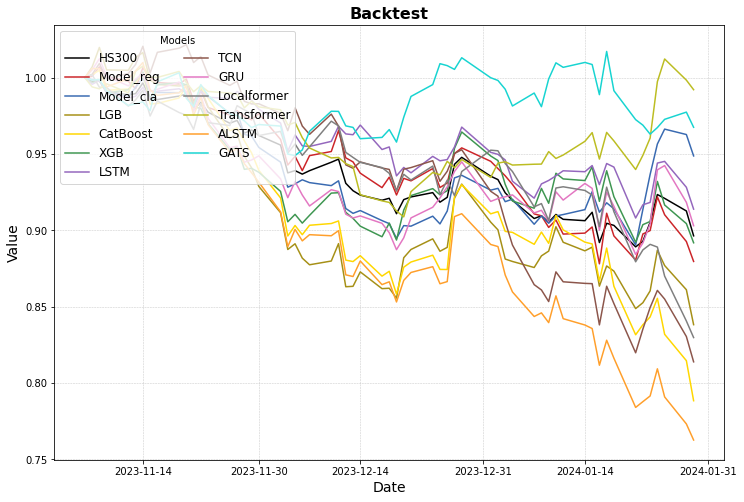

Chart saved to /root/autodl-tmp/Stockformer/Stockformer_run/Visualisation_of_results/backtest_result/2023-11-07_to_2024-01-30_backtest_result.png


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 增大图形尺寸
plt.figure(figsize=(12, 8))

# 使用调色板
palette = {
    'HS300': 'black',        # 黑色给基准指数
    'Model_reg': '#CC2529',  # 红色变暗
    'Model_cla': '#396AB1',  # 蓝色变暗
    'LGB': '#a69016',        # 棕黄色
    'CatBoost': '#FFD700',   # 深黄色
    'XGB': '#3E9651',        # 深绿色
    'LSTM': '#9467BD',       # 深紫色
    'TCN': '#8C564B',        # 棕色
    'GRU': '#E377C2',        # 粉色
    'Localformer': '#7F7F7F',# 深灰色
    'Transformer': '#BCBD22', # 酸橙色
    'ALSTM': '#ff9f2b', # 橙色
    'GATS': '#17d4d1', # 青色
}


# 绘制线图
sns.lineplot(data=hs300['cumulative_return'], label='HS300', color=palette['HS300'])
sns.lineplot(data=result_reg['净值'], label='Model_reg', color=palette['Model_reg'])
sns.lineplot(data=result_cla['净值'], label='Model_cla', color=palette['Model_cla'])

# 根据条件绘制其他模型
if params.if_lgb:
    sns.lineplot(data=result_lgb['净值'], label='LGB', color=palette['LGB'])
if params.if_catboost:
    sns.lineplot(data=result_catboost['净值'], label='CatBoost', color=palette['CatBoost'])
if params.if_xgb:
    sns.lineplot(data=result_xgb['净值'], label='XGB', color=palette['XGB'])
if params.if_lstm:
    sns.lineplot(data=result_lstm['净值'], label='LSTM', color=palette['LSTM'])
if params.if_tcn:
    sns.lineplot(data=result_tcn['净值'], label='TCN', color=palette['TCN'])
if params.if_gru:
    sns.lineplot(data=result_gru['净值'], label='GRU', color=palette['GRU'])
if params.if_localformer:
    sns.lineplot(data=result_localformer['净值'], label='Localformer', color=palette['Localformer'])
if params.if_transformer:
    sns.lineplot(data=result_transformer['净值'], label='Transformer', color=palette['Transformer'])
if params.if_alstm:
    sns.lineplot(data=result_alstm['净值'], label='ALSTM', color=palette['ALSTM'])
if params.if_gats:
    sns.lineplot(data=result_gats['净值'], label='GATS', color=palette['GATS'])

# 设置标题和标签
plt.title('Backtest', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)

# 设置图例位置和大小
plt.legend(title='Models', loc='upper left', fontsize=12)

# 设置网格
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# 显示图例
plt.legend(title='Models', loc='upper left', fontsize=12, ncol=2)

# 构建保存路径
save_path = f'/root/autodl-tmp/Stockformer/Stockformer_run/Visualisation_of_results/backtest_result/{params.start_date}_to_{params.end_date}_backtest_result.png'

# 保存图形
plt.savefig(save_path, dpi=300, facecolor='white')  # 使用300 DPI保存图像以保证高清

# 显示图形
plt.show()

# 输出保存路径信息
print(f"Chart saved to {save_path}")
